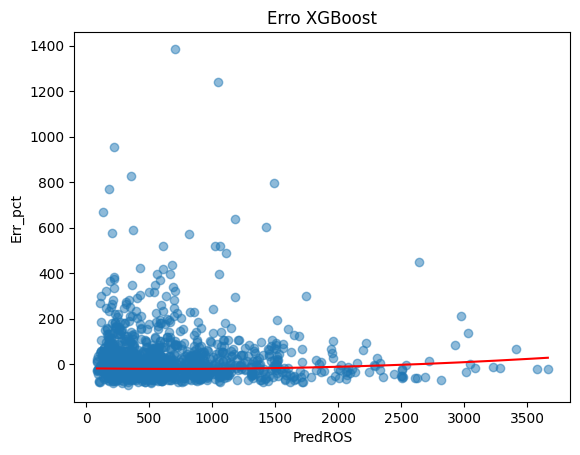

Modelo de erro XGBoost salvo em model_xgboost_error.pkl


In [1]:
import geopandas as gpd
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ============================
# Treinar modelo de erro XGBoost
# ============================
df = gpd.read_file("../../Data/Models/PT_FireProg_model_SHAP_xgboost.csv")

df['PredROS_linear'] = pd.to_numeric(df['PredROS_linear'], errors='coerce')
df['Err_pct'] = pd.to_numeric(df['Err_pct'], errors='coerce')

df_clean = df[['PredROS_linear', 'Err_pct']].dropna()
X = df_clean['PredROS_linear'].values.reshape(-1, 1)
y = df_clean['Err_pct'].values

degree = 2
error_model_xgb = make_pipeline(
    PolynomialFeatures(degree),
    RANSACRegressor(estimator=LinearRegression())
)
error_model_xgb.fit(X, y)

# Visualização
plt.scatter(X, y, alpha=0.5)
x_line = np.linspace(X.min(), X.max(), 200)
plt.plot(x_line, error_model_xgb.predict(x_line.reshape(-1, 1)), color='red')
plt.xlabel("PredROS")
plt.ylabel("Err_pct")
plt.title("Erro XGBoost")
plt.show()

# Salvar modelo corretamente (NÃO salvar função!)
with open("../../Data/Models/model_xgboost_error.pkl", "wb") as f:
    pickle.dump(error_model_xgb, f)

print("Modelo de erro XGBoost salvo em model_xgboost_error.pkl")

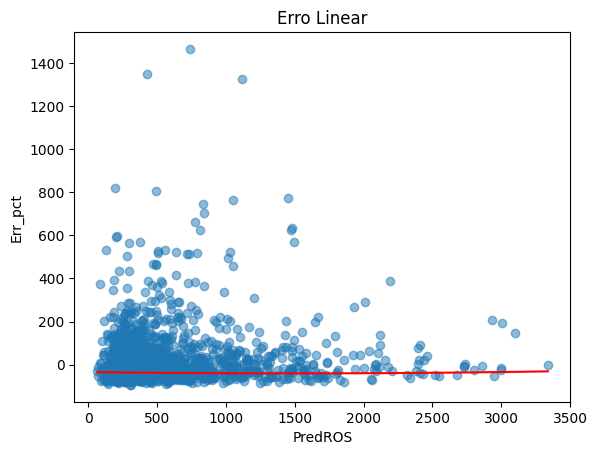

Modelo de erro Linear salvo em model_linear_error.pkl


In [2]:
# ============================
# Treinar modelo de erro Linear
# ============================
df = gpd.read_file("../../Data/Models/PT_FireProg_model_SHAP_Linear.csv")

df['PredROS_linear'] = pd.to_numeric(df['PredROS_linear'], errors='coerce')
df['Err_pct'] = pd.to_numeric(df['Err_pct'], errors='coerce')

df_clean = df[['PredROS_linear', 'Err_pct']].dropna()
X = df_clean['PredROS_linear'].values.reshape(-1, 1)
y = df_clean['Err_pct'].values

error_model_linear = make_pipeline(
    PolynomialFeatures(degree),
    RANSACRegressor(estimator=LinearRegression())
)
error_model_linear.fit(X, y)

# Visualização
plt.scatter(X, y, alpha=0.5)
x_line = np.linspace(X.min(), X.max(), 200)
plt.plot(x_line, error_model_linear.predict(x_line.reshape(-1, 1)), color='red')
plt.xlabel("PredROS")
plt.ylabel("Err_pct")
plt.title("Erro Linear")
plt.show()

# Salvar modelo corretamente
with open("../../Data/Models/model_linear_error.pkl", "wb") as f:
    pickle.dump(error_model_linear, f)

print("Modelo de erro Linear salvo em model_linear_error.pkl")

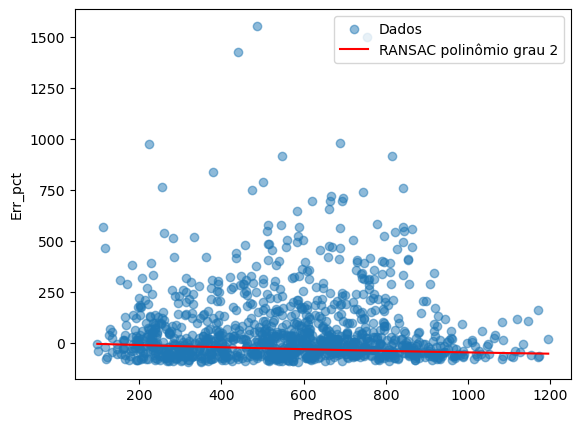

Função polinomial robusta salva em 'model_benchmark_error.pkl'


In [31]:
import geopandas as gpd
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Carregar shapefile
df = gpd.read_file(r"..\..\Data\Models\PT_FireProg_model_SHAP_Benchmark.csv")

# Selecionar colunas e remover NaNs
df['PredROS_linear'] = pd.to_numeric(df['PredROS_linear'], errors='coerce')
df['Err_pct'] = pd.to_numeric(df['Err_pct'], errors='coerce')

df_clean = df[['PredROS_linear', 'Err_pct']].dropna()
X = df_clean['PredROS_linear'].values.reshape(-1,1)
y = df_clean['Err_pct'].values



# Ajuste polinomial robusto (grau 3) usando RANSAC
degree = 2
model = make_pipeline(
    PolynomialFeatures(degree),
    RANSACRegressor(estimator=LinearRegression())  # <--- alteração aqui
)
model.fit(X, y)

# Função para prever PredErr a partir de PredROS
def prederr_from_predros(x):
    x = np.array(x).reshape(-1,1)
    return model.predict(x)

# Visualizar ajuste
plt.scatter(X, y, alpha=0.5, label='Dados')
x_line = np.linspace(X.min(), X.max(), 200)
plt.plot(x_line, prederr_from_predros(x_line), color='red', label=f'RANSAC polinômio grau {degree}')
plt.xlabel('PredROS')
plt.ylabel('Err_pct')
plt.legend()
plt.show()

# Salvar função em pickle
with open(r'..\..\Data\Models\model_benchmark_error.pkl', 'wb') as f:
    pickle.dump(prederr_from_predros, f)

print("Função polinomial robusta salva em 'model_benchmark_error.pkl'")